# Install Libraries

In [1]:
%%time

!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=6e2af4cddfccba40000e58bb822f2411891eb26aa996c06a6e5fccba61b65622
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
CPU times: user 199 ms, sys: 40.6 ms, total: 239 ms
Wall time: 15.9 s


In [2]:
%%time

!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.7 MB/s eta 0:00:0000:01
CPU times: user 141 ms, sys: 28.8 ms, total: 170 ms
Wall time: 12.1 s


In [3]:
%%time

!pip install num2words

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.0 MB/s eta 0:00:00 0:00:01
CPU times: user 129 ms, sys: 34.2 ms, total: 164 ms
Wall time: 12.1 s


In [4]:
%%time

!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 19.2 MB/s eta 0:00:0000:0100:01
CPU times: user 134 ms, sys: 43.4 ms, total: 177 ms
Wall time: 12.6 s


# Import Libraries

In [5]:
%%time

import warnings
warnings.filterwarnings('ignore')

CPU times: user 39 µs, sys: 10 µs, total: 49 µs
Wall time: 52.7 µs


In [6]:
%%time

# Basic imports:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import re
from datasets import load_dataset, Dataset

# NLTK, num2words, lemmatizer, stemmer, autocorrect imports:
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller

# ML imports:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import torch
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from torch.nn import CrossEntropyLoss
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

# DL imports:
from transformers import AutoTokenizer, TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification
from torch.utils.data import DataLoader
import evaluate
from transformers import (
    AutoTokenizer, 
    AutoModelForSequenceClassification, 
    Trainer, 
    TrainingArguments, 
    DataCollatorWithPadding
)

# Visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: user 12.6 s, sys: 1.88 s, total: 14.5 s
Wall time: 24.4 s


In [7]:
%%time

# Download necessary resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/w

# Load Files

In [8]:
%%time

train = pd.read_csv('/kaggle/input/unzip-file/train.csv', encoding='ISO-8859-1')
test = pd.read_csv('/kaggle/input/unzip-file/test.csv', encoding='ISO-8859-1')
sample_submission = pd.read_csv('/kaggle/input/unzip-file/sample_submission.csv', encoding='ISO-8859-1')

CPU times: user 363 ms, sys: 70.2 ms, total: 433 ms
Wall time: 767 ms


In [9]:
%%time

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74067 non-null  int64  
 1   product_uid    74067 non-null  int64  
 2   product_title  74067 non-null  object 
 3   search_term    74067 non-null  object 
 4   relevance      74067 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB
CPU times: user 25.5 ms, sys: 3.07 ms, total: 28.5 ms
Wall time: 47.5 ms


In [10]:
%%time

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166693 entries, 0 to 166692
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             166693 non-null  int64 
 1   product_uid    166693 non-null  int64 
 2   product_title  166693 non-null  object
 3   search_term    166693 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.1+ MB
CPU times: user 38.4 ms, sys: 1.02 ms, total: 39.4 ms
Wall time: 37.5 ms


# Data / Text Preprocessing

In [11]:
%%time

def clean_encoding_issues(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].apply(lambda x: x.encode('ISO-8859-1', 'ignore').decode('ISO-8859-1', 'ignore') if isinstance(x, str) else x)
    return df

train = clean_encoding_issues(train)
test = clean_encoding_issues(test)

CPU times: user 402 ms, sys: 18.5 ms, total: 420 ms
Wall time: 419 ms


In [12]:
%%time

# Applying lowercasing 
def apply_lower_case(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].str.lower()
    return df

train = apply_lower_case(train)
test = apply_lower_case(test)

CPU times: user 117 ms, sys: 23.2 ms, total: 140 ms
Wall time: 138 ms


In [13]:
%%time

# Set of stopwords in English
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a specific dataframe
def remove_stopwords(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    return df

# Remove stopwords
train = remove_stopwords(train)
test = remove_stopwords(test)

CPU times: user 1.13 s, sys: 5.78 ms, total: 1.14 s
Wall time: 1.14 s


In [14]:
%%time

from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
ps = PorterStemmer()

# Function to apply stemming to a specific dataframe
def apply_stemming(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
    return df

# Apply stemming
train = apply_stemming(train)
test = apply_stemming(test)

CPU times: user 1min 37s, sys: 9.13 ms, total: 1min 37s
Wall time: 1min 37s


In [15]:
%%time

from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization 
def apply_lemmatization(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    return df

# Apply lemmatization 
train = apply_lemmatization(train)
test = apply_lemmatization(test)

CPU times: user 20.4 s, sys: 148 ms, total: 20.6 s
Wall time: 20.6 s


In [16]:
%%time

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Function to encode categorical columns in a dataframe
def encode_categorical_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = le.fit_transform(df[col])
    return df

# Encode categorical columns in both datasets
train = encode_categorical_columns(train)
test = encode_categorical_columns(test)

CPU times: user 596 ms, sys: 8.96 ms, total: 605 ms
Wall time: 604 ms


In [17]:
%%time

# Define the text columns to be vectorized
text_columns = ['product_title', 'search_term']

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [18]:
%%time

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features for simplicity

CPU times: user 42 µs, sys: 1 µs, total: 43 µs
Wall time: 46.3 µs


In [19]:
%%time

train['product_title'] = train['product_title'].astype(str)
train['search_term'] = train['search_term'].astype(str)

CPU times: user 62.9 ms, sys: 999 µs, total: 63.9 ms
Wall time: 63.4 ms


In [20]:
%%time

# Apply TF-IDF transformation on the text columns
tfidf_product_title = tfidf_vectorizer.fit_transform(train['product_title']).toarray()
tfidf_search_term = tfidf_vectorizer.fit_transform(train['search_term']).toarray()

CPU times: user 862 ms, sys: 70 ms, total: 932 ms
Wall time: 943 ms


In [21]:
%%time

# Combine the TF-IDF features into a single feature set
X_text_features = np.hstack((tfidf_product_title, tfidf_search_term))

CPU times: user 214 ms, sys: 416 ms, total: 630 ms
Wall time: 628 ms


# Count the number of searches made for each product

In [22]:
%%time

interactions = train.groupby('product_uid').size().reset_index(name='interaction_count')

interactions

CPU times: user 9.21 ms, sys: 2.96 ms, total: 12.2 ms
Wall time: 10.5 ms


,product_uid,interaction_count
0,100001,2
1,100002,1
2,100005,2
3,100006,3
4,100007,1
...,...,...
54662,206638,1
54663,206639,1
54664,206641,1
54665,206648,1


# The number of times a product appears for different search terms

In [23]:
%%time

ad_impressions = train.groupby('product_uid').size().reset_index(name='ad_impressions')

ad_impressions

CPU times: user 8.04 ms, sys: 1.03 ms, total: 9.07 ms
Wall time: 8.02 ms


,product_uid,ad_impressions
0,100001,2
1,100002,1
2,100005,2
3,100006,3
4,100007,1
...,...,...
54662,206638,1
54663,206639,1
54664,206641,1
54665,206648,1


In [24]:
%%time

# Most ad impression

ad_impressions.value_counts()

CPU times: user 13.4 ms, sys: 0 ns, total: 13.4 ms
Wall time: 12.7 ms


product_uid  ad_impressions
206650       1                 1
100001       2                 1
100002       1                 1
100005       2                 1
100006       3                 1
                              ..
100022       3                 1
100023       3                 1
100026       2                 1
100027       1                 1
100028       5                 1
Name: count, Length: 54667, dtype: int64

# User Interactions (Clicks or No Clicks)

In [25]:
%%time

train['clicked'] = train['relevance'].apply(lambda x: 1 if x > 2.5 else 0)

train['clicked']

CPU times: user 57.2 ms, sys: 3 µs, total: 57.2 ms
Wall time: 56.2 ms


0        1
1        0
2        1
3        0
4        1
        ..
74062    0
74063    1
74064    0
74065    1
74066    0
Name: clicked, Length: 74067, dtype: int64

In [26]:
%%time

# Most User Clicked By Relevance

train['clicked'].value_counts()

CPU times: user 1.16 ms, sys: 4 µs, total: 1.16 ms
Wall time: 2.26 ms


clicked
0    39729
1    34338
Name: count, dtype: int64

# User interactions (clicks) by product

In [27]:
%%time

user_interactions = train.groupby('product_uid')['clicked'].sum().reset_index(name='total_clicks')

user_interactions

CPU times: user 8.35 ms, sys: 985 µs, total: 9.34 ms
Wall time: 8.99 ms


,product_uid,total_clicks
0,100001,1
1,100002,1
2,100005,1
3,100006,3
4,100007,1
...,...,...
54662,206638,0
54663,206639,1
54664,206641,0
54665,206648,1


In [28]:
%%time

# Most User Clicked By Product

user_interactions.value_counts()

CPU times: user 10.5 ms, sys: 2.01 ms, total: 12.5 ms
Wall time: 11.4 ms


product_uid  total_clicks
206650       0               1
100001       1               1
100002       1               1
100005       1               1
100006       3               1
                            ..
100022       1               1
100023       1               1
100026       0               1
100027       0               1
100028       1               1
Name: count, Length: 54667, dtype: int64

# Historical Engagement

In [29]:
%%time

historical_engagement = train.groupby('id').size().reset_index(name='search_count')

historical_engagement

CPU times: user 11.6 ms, sys: 39 µs, total: 11.7 ms
Wall time: 10.4 ms


,id,search_count
0,2,1
1,3,1
2,9,1
3,16,1
4,17,1
...,...,...
74062,221457,1
74063,221458,1
74064,221463,1
74065,221471,1


In [30]:
%%time

# Most Historical Engagement

historical_engagement.value_counts()

CPU times: user 14.9 ms, sys: 2.02 ms, total: 16.9 ms
Wall time: 15.9 ms


id      search_count
221473  1               1
2       1               1
3       1               1
9       1               1
16      1               1
                       ..
90      1               1
92      1               1
101     1               1
105     1               1
106     1               1
Name: count, Length: 74067, dtype: int64

# Define User Features

In [31]:
%%time

user_features = train.groupby('id').agg(
    search_count=('id', 'size'),  # Number of searches by the user
    avg_relevance=('relevance', 'mean'),  # Average relevance of the user's searches
    total_clicks=('clicked', 'sum')  # Total clicks 
).reset_index()

user_features

CPU times: user 20.8 ms, sys: 3.02 ms, total: 23.8 ms
Wall time: 26.4 ms


,id,search_count,avg_relevance,total_clicks
0,2,1,3.00,1
1,3,1,2.50,0
2,9,1,3.00,1
3,16,1,2.33,0
4,17,1,2.67,1
...,...,...,...,...
74062,221457,1,1.00,0
74063,221458,1,3.00,1
74064,221463,1,2.33,0
74065,221471,1,3.00,1


# Define Ad Features

In [32]:
%%time

ad_features = train.groupby('product_uid').agg(
    product_title=('product_title', 'first'),  # Use the product title as the ad description
    avg_relevance=('relevance', 'mean'),  # Average relevance score for the ad
    total_impressions=('product_uid', 'size'),  # Count of ad impressions 
    total_clicks=('clicked', 'sum')  # Total clicks on this product
).reset_index()

ad_features

CPU times: user 35.2 ms, sys: 1.96 ms, total: 37.2 ms
Wall time: 37.2 ms


,product_uid,product_title,avg_relevance,total_impressions,total_clicks
0,100001,44593,2.75,2,1
1,100002,5536,3.00,1,1
2,100005,12418,2.50,2,1
3,100006,51708,2.89,3,3
4,100007,30895,2.67,1,1
...,...,...,...,...,...
54662,206638,4188,1.00,1,0
54663,206639,37591,3.00,1,1
54664,206641,43215,2.33,1,0
54665,206648,37974,3.00,1,1


# Define Contextual Features

In [33]:
%%time

contextual_features = train.groupby('search_term').agg(
    search_count=('search_term', 'size'),  # Number of times the search term was used
    avg_relevance=('relevance', 'mean'),  # Average relevance score for the search term
    total_clicks=('clicked', 'sum')  # Total clicks generated from the search term
).reset_index()

contextual_features

CPU times: user 36.3 ms, sys: 1.01 ms, total: 37.3 ms
Wall time: 35.8 ms


,search_term,search_count,avg_relevance,total_clicks
0,0,20,1.551000,0
1,1,8,2.373750,3
2,10,11,2.333636,4
3,100,2,2.335000,1
4,1000,11,2.302727,3
...,...,...,...,...
11734,9995,11,1.909091,1
11735,9996,7,2.571429,5
11736,9997,10,1.900000,1
11737,9998,9,2.110000,0


# The most similar search term and product pairs - user clicks based on cosine similarity

In [34]:
%%time

# Filter dataset to only include rows where users clicked
clicked_data = train[train['clicked'] == 1]

# Combine 'search_term' and 'product_title' into a single text column
clicked_data['combined_text'] = clicked_data['search_term'] + ' ' + clicked_data['product_title']

# Vectorize the combined text using TF-IDF
vectorizer = TfidfVectorizer()
combined_text_vectors = vectorizer.fit_transform(clicked_data['combined_text'])

# Use NearestNeighbors for efficient similarity computation
nbrs = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute').fit(combined_text_vectors)

# Find the nearest neighbors for each entry in the dataset
distances, indices = nbrs.kneighbors(combined_text_vectors)

# Create a DataFrame to store the similarities 
similarity_results = []

for idx, neighbors in enumerate(indices):
    for neighbor_idx, distance in zip(neighbors, distances[idx]):
        similarity_results.append({
            'search_term_product': clicked_data['combined_text'].iloc[idx],
            'similar_to': clicked_data['combined_text'].iloc[neighbor_idx],
            'cosine_similarity': 1 - distance  # Cosine similarity is 1 - cosine distance
        })

similarity_df = pd.DataFrame(similarity_results)

# Sort the results by cosine similarity
most_similar_pairs_sorted = similarity_df.sort_values(by='cosine_similarity', ascending=False)

# The top similar search terms and products
most_similar_pairs_sorted.head(10)

CPU times: user 21.6 s, sys: 10.8 s, total: 32.3 s
Wall time: 32.3 s


,search_term_product,similar_to,cosine_similarity
10,3745 5536,3745 5536,1.0
20,9489 12418,9489 12418,1.0
30,3496 51708,3496 51708,1.0
0,1942 44593,1942 44593,1.0
1,1942 44593,1942 44593,1.0
174490,6359 28775,6359 28775,1.0
174480,8492 12024,8492 12024,1.0
174540,9825 4279,9825 4279,1.0
174530,2965 41848,2965 41848,1.0
174500,11322 15097,11322 15097,1.0


# Visualize top 10 most clicked products

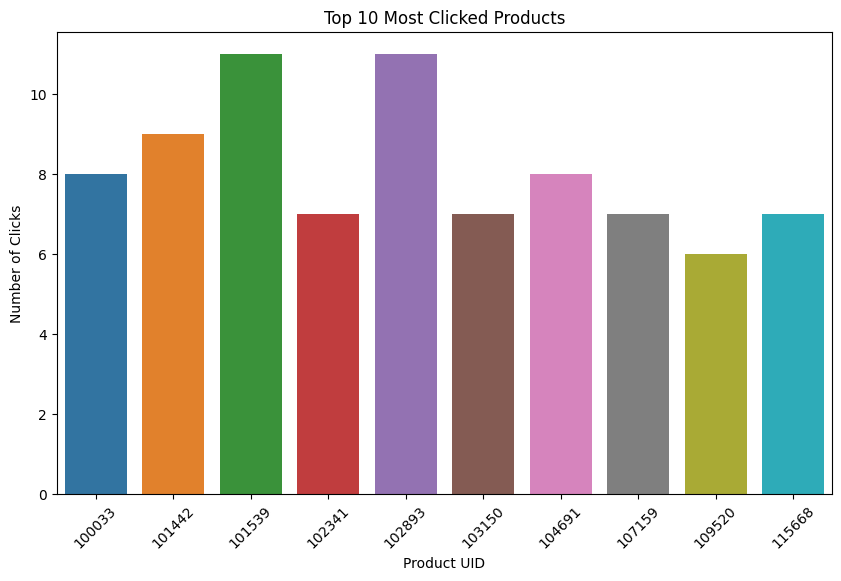

CPU times: user 857 ms, sys: 234 ms, total: 1.09 s
Wall time: 724 ms


In [35]:
%%time

# Aggregate the data to get the count of clicks for each product
clicked_product_counts = train[train['clicked'] == 1].groupby('product_uid')['clicked'].count().reset_index()
clicked_product_counts = clicked_product_counts.sort_values(by='clicked', ascending=False)

# Plot the top 10 most clicked products
plt.figure(figsize=(10, 6))
sns.barplot(x='product_uid', y='clicked', data=clicked_product_counts.head(10))
plt.title('Top 10 Most Clicked Products')
plt.xlabel('Product UID')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.show()

# Track Click-Through Rate (CTR)

In [36]:
%%time

# Calculate the number of impressions (number of times each product appeared in searches)
impressions = train.groupby('product_uid').size().reset_index(name='impressions')

# Calculate the number of clicks (number of times each product was clicked)
clicks = train[train['clicked'] == 1].groupby('product_uid').size().reset_index(name='clicks')

# Merge the impressions and clicks data
ctr_data = pd.merge(impressions, clicks, on='product_uid', how='left')

# Fill NaN values in the 'clicks' column with 0 (if a product was shown but never clicked)
ctr_data['clicks'] = ctr_data['clicks'].fillna(0)

# Calculate CTR (Click-Through Rate)
ctr_data['CTR'] = (ctr_data['clicks'] / ctr_data['impressions']) * 100

# Sort by CTR to see the top-performing products
ctr_data_sorted = ctr_data.sort_values(by='CTR', ascending=False)

# The top products with the highest CTR
ctr_data_sorted.head(10)

CPU times: user 26.4 ms, sys: 3.07 ms, total: 29.5 ms
Wall time: 30.4 ms


,product_uid,impressions,clicks,CTR
10,100016,1,1.0,100.0
54665,206648,1,1.0,100.0
54663,206639,1,1.0,100.0
1,100002,1,1.0,100.0
54661,206637,1,1.0,100.0
3,100006,3,3.0,100.0
4,100007,1,1.0,100.0
54625,206552,1,1.0,100.0
54627,206563,1,1.0,100.0
54629,206569,1,1.0,100.0


# Visualize the top products with the highest CTR

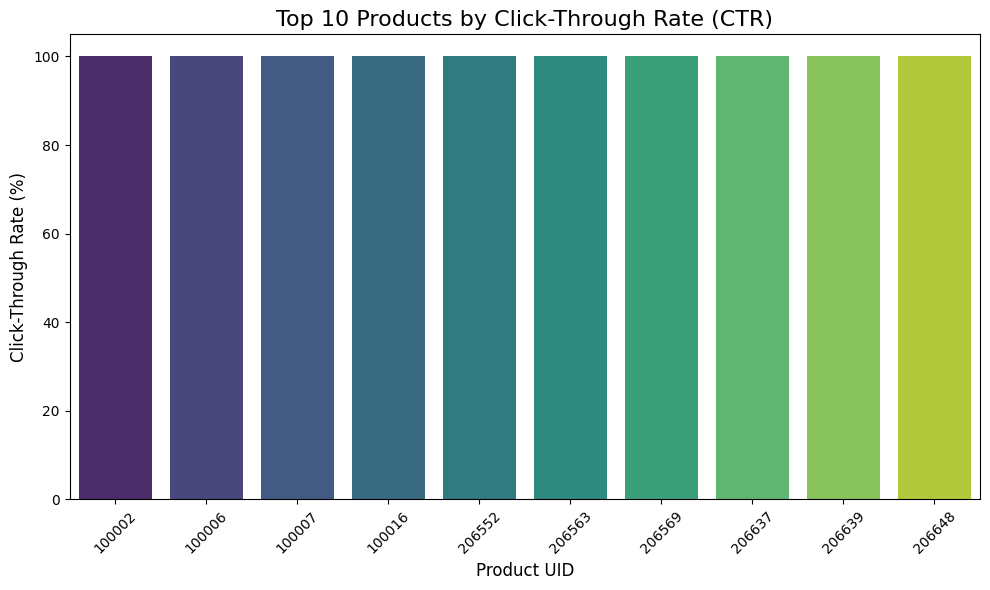

CPU times: user 539 ms, sys: 237 ms, total: 776 ms
Wall time: 380 ms


In [37]:
%%time

# Sort the data by CTR and select the top 10 products with the highest CTR
top_ctr_data = ctr_data_sorted.head(10)

# Plot the top 10 products based on CTR using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='product_uid', y='CTR', data=top_ctr_data, palette='viridis')

# Add titles and labels
plt.title('Top 10 Products by Click-Through Rate (CTR)', fontsize=16)
plt.xlabel('Product UID', fontsize=12)
plt.ylabel('Click-Through Rate (%)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Popular Products Recommendation

In [38]:
%%time

# Count the number of clicks per product
popular_products = train.groupby('product_uid')['clicked'].sum().sort_values(ascending=False)

# Function to recommend the top N popular products
def recommend_popular_products(top_n=5):
    return popular_products.index[:top_n].tolist()

# Recommended Popular Products
recommended_popular_products = recommend_popular_products(top_n=5)
print(recommended_popular_products)

[102893, 101539, 101442, 100033, 104691]
CPU times: user 12.6 ms, sys: 1.06 ms, total: 13.7 ms
Wall time: 12.4 ms
